# Credit Card Fraud Detection: Capstone Project (DA)


## Data Understanding

#### The data set contains credit card transactions of around 1,000 cardholders with a pool of 800 merchants from 1 Jan 2019 to 31 Dec 2020. It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions. The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. Now, since the data set is highly imbalanced, it needs to be handled before model building. The feature 'amt' represents the transaction amount. The feature 'is_fraud' represents class labelling and takes the value 1 the transaction is a fraudulent transaction and 0, otherwise.


## Approach:

##### 1. Importing required Libraries: 
Import the required Libraries - Numpy, Pandas, Matplotlib,
Sklearn, Scipy, Statsmodels etc. which are required for analysis and model building.

##### 2. On-Boarding Data: 
Load the given data set into the Notebook and try to understand the basic
information of the same, like shape, size, info etc.

##### 3. Data Cleaning:
Treat the duplicate data, null data, outliers as needed, based on EDA.

##### 4. EDA: 
Performing Univariate Analysis, Bi-Variate Analysis, New Feature preparation, Outlier
Treatment, Data Imbalance Check etc.

##### 5. Handling Data Imbalance:
Handle imbalance of data by appropriate techniques (Over sampling/under sampling/ SMOTE technique)

##### 6. Test -Train split:
training and testing.

##### 7. Model Building: 

- Logistic Regression
- Decision Trees
- Random Forest

#####  8. Hyper-parameter tuning : 
Perform the hyper parameter tuning and observe the relevant metrics like - accuracy/ recall/ sensitivity/ AUC etc. for each model.

##### 9. Cost-benefit analysis:



### 1. Importing required Libraries: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 2. On-Boarding Data: 

In [2]:
dataframe_1 = pd.read_csv('fraudTest.csv')
dataframe_1.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [3]:
dataframe_2 = pd.read_csv('fraudTrain.csv')
dataframe_2.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [4]:
dataframe_1 = dataframe_1.drop(dataframe_1.columns[0], axis=1)
dataframe_1.shape

(555719, 22)

In [5]:
dataframe_2 = dataframe_2.drop(dataframe_2.columns[0], axis=1)
dataframe_2.shape

(1296675, 22)

In [6]:
df = pd.concat([dataframe_1,dataframe_2])
df.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...      lat  \
0   Elliott      M            351 Darlene Green    Columbia  ...  33.9659   
1  Williams      F             3638 Marsh Union     Altonah  ...  40.3207   
2     Lopez      F         9333 Valentine Point    Bellmore  ...  40.6729   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...  28.5697   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...  44.2529   

       long  city_pop                     job         dob  \
0  -80.9355    333497     Mechanical engineer  1968-03-19   
1 -110.4360       302  Sales professional, IT  1990-01-17   
2  -73.5365     34496       Librarian, public  1970-10-21   
3  -80.8191     54767            Set designer  1987-07-25   
4  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [7]:
df.shape

(1852394, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [9]:
df.describe()

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03  
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02  
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00  
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00  
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00  
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00  
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00

### 3. Data Cleaning:

In [10]:
# missing values
round(100*(df.isnull().sum())/len(df), 2)

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

<div class="alert alert-block alert-info">  
    
#### There are no missing values present in the dataset.

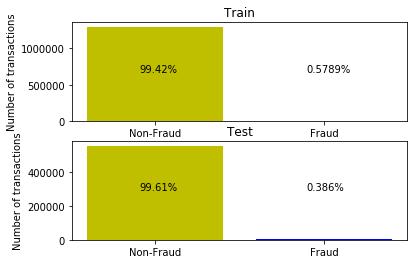

In [11]:
# Checking Class Imbalance

classes_train=dataframe_2['is_fraud'].value_counts()
normal_share_train=classes_train[0]/dataframe_2['is_fraud'].count()*100
fraud_share_train=classes_train[1]/dataframe_2['is_fraud'].count()*100

classes_test=dataframe_1['is_fraud'].value_counts()
normal_share_test=classes_test[0]/dataframe_1['is_fraud'].count()*100
fraud_share_test=classes_test[1]/dataframe_1['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['y','b'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['y','b'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

In [12]:
#distribution of dependant variables

df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

is_fraud    count  percentage
0         0  1842743   99.478999
1         1     9651    0.521001

<div class="alert alert-block alert-info"> 

#### The data is highly imbalanced.

In [13]:
#Finiding unique values in each column
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [14]:
# Converting date columns to datetime format and deriving date and year-month from trans_date_trans_time

df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...  \
0   Elliott      M            351 Darlene Green    Columbia  ...   
1  Williams      F             3638 Marsh Union     Altonah  ...   
2     Lopez      F         9333 Valentine Point    Bellmore  ...   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...   

                      job        dob                         trans_num  \
0     Mechanical engineer 1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3   
1  Sales professional, IT 1990-01-17  324cc204407e99f51b0d6ca0055005e7   
2       Librarian, public 1970-10-21  c81755dbbbea9d5c77f094348a7579be   
3            Set designer 1987-07-25  2159175b9efe66dc301f149d3d5abf8c   
4      Furniture designer 1955-07-06  57ff021bd3f328f8738bb535c302a31b   

    unix_time  merch_lat  merch_long is_fraud trans_date  day_of_week  \
0  1371816865  33.986391  -81.200714        0 2020-06-21       Sunday   
1  1371816873  39.450498 -109.960431        0 2020-06-21       Sunday   
2  1371816893  40.495810  -74.196111        0 2020-06-21       Sunday   
3  1371816915  28.812398  -80.883061        0 2020-06-21       Sunday   
4  1371816917  44.959148  -85.884734        0 2020-06-21       Sunday   

   year_month  
0     2020-06  
1     2020-06  
2     2020-06  
3     2020-06  
4     2020-06  

[5 rows x 25 columns]

## 4. EDA: 

### Univariate Anlaysis 



##### Univariate Analysis of Numerical Variables

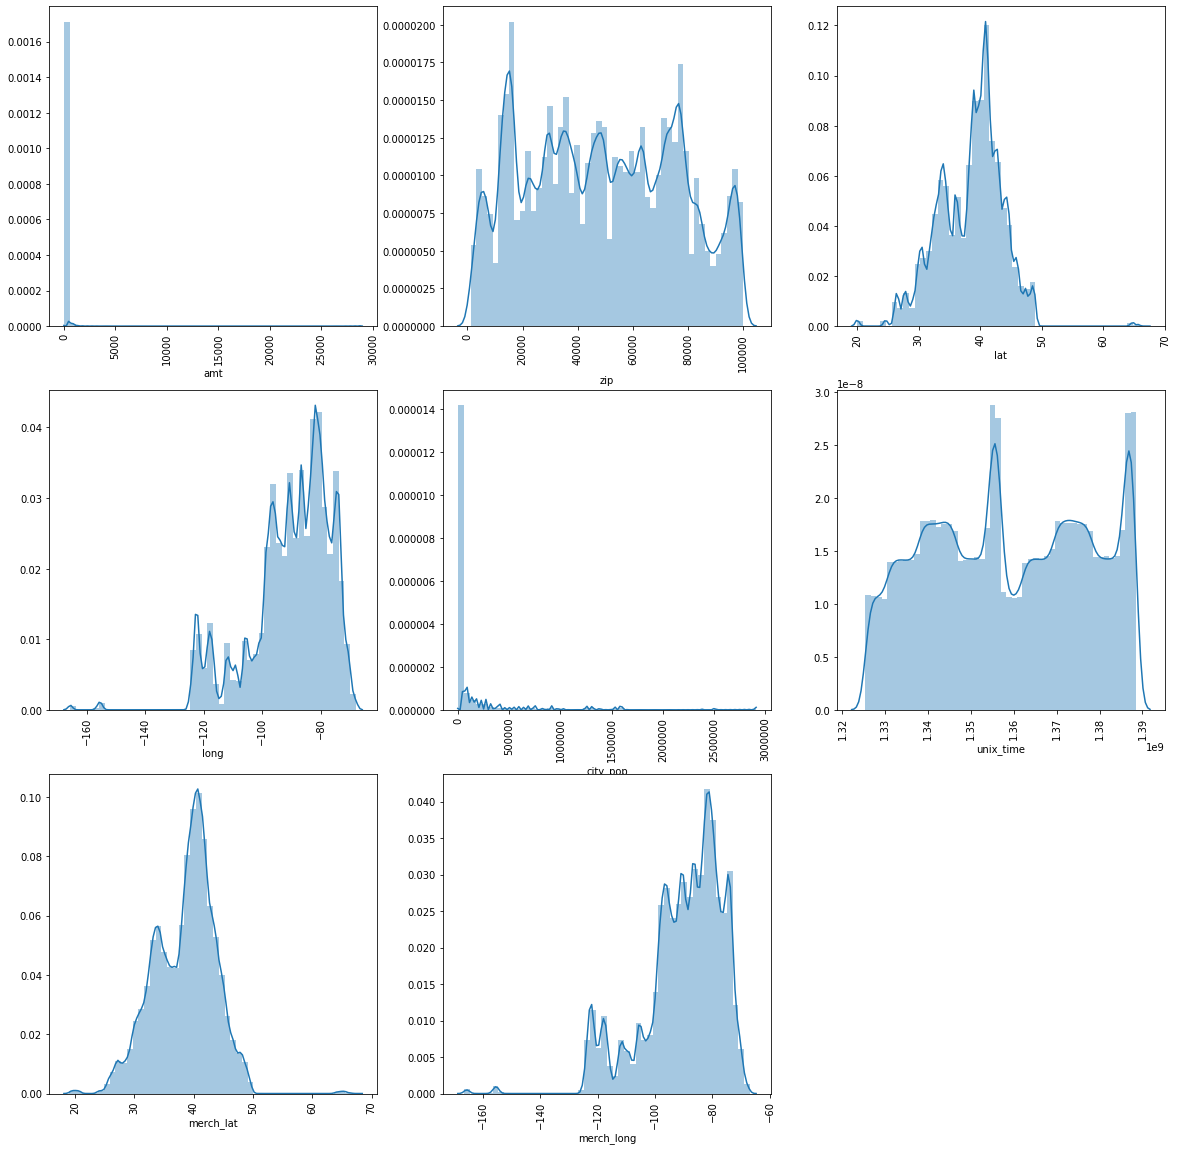

In [15]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.distplot(df['amt'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.distplot(df['zip'])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.distplot(df['lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,4)
sns.distplot(df['long'])
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.distplot(df['city_pop'])
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.distplot(df['unix_time'])
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
sns.distplot(df['merch_lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.distplot(df['merch_long'])
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above plot shows the distribution of 'amt, zip', 'lat', 'long', 'city_pop', unix_time',  'merch_lat' and 'merch_long'

- The 'amt' and 'city_pop' are highly skewed variables.

#### Univariate Analysis of Categorical Variables

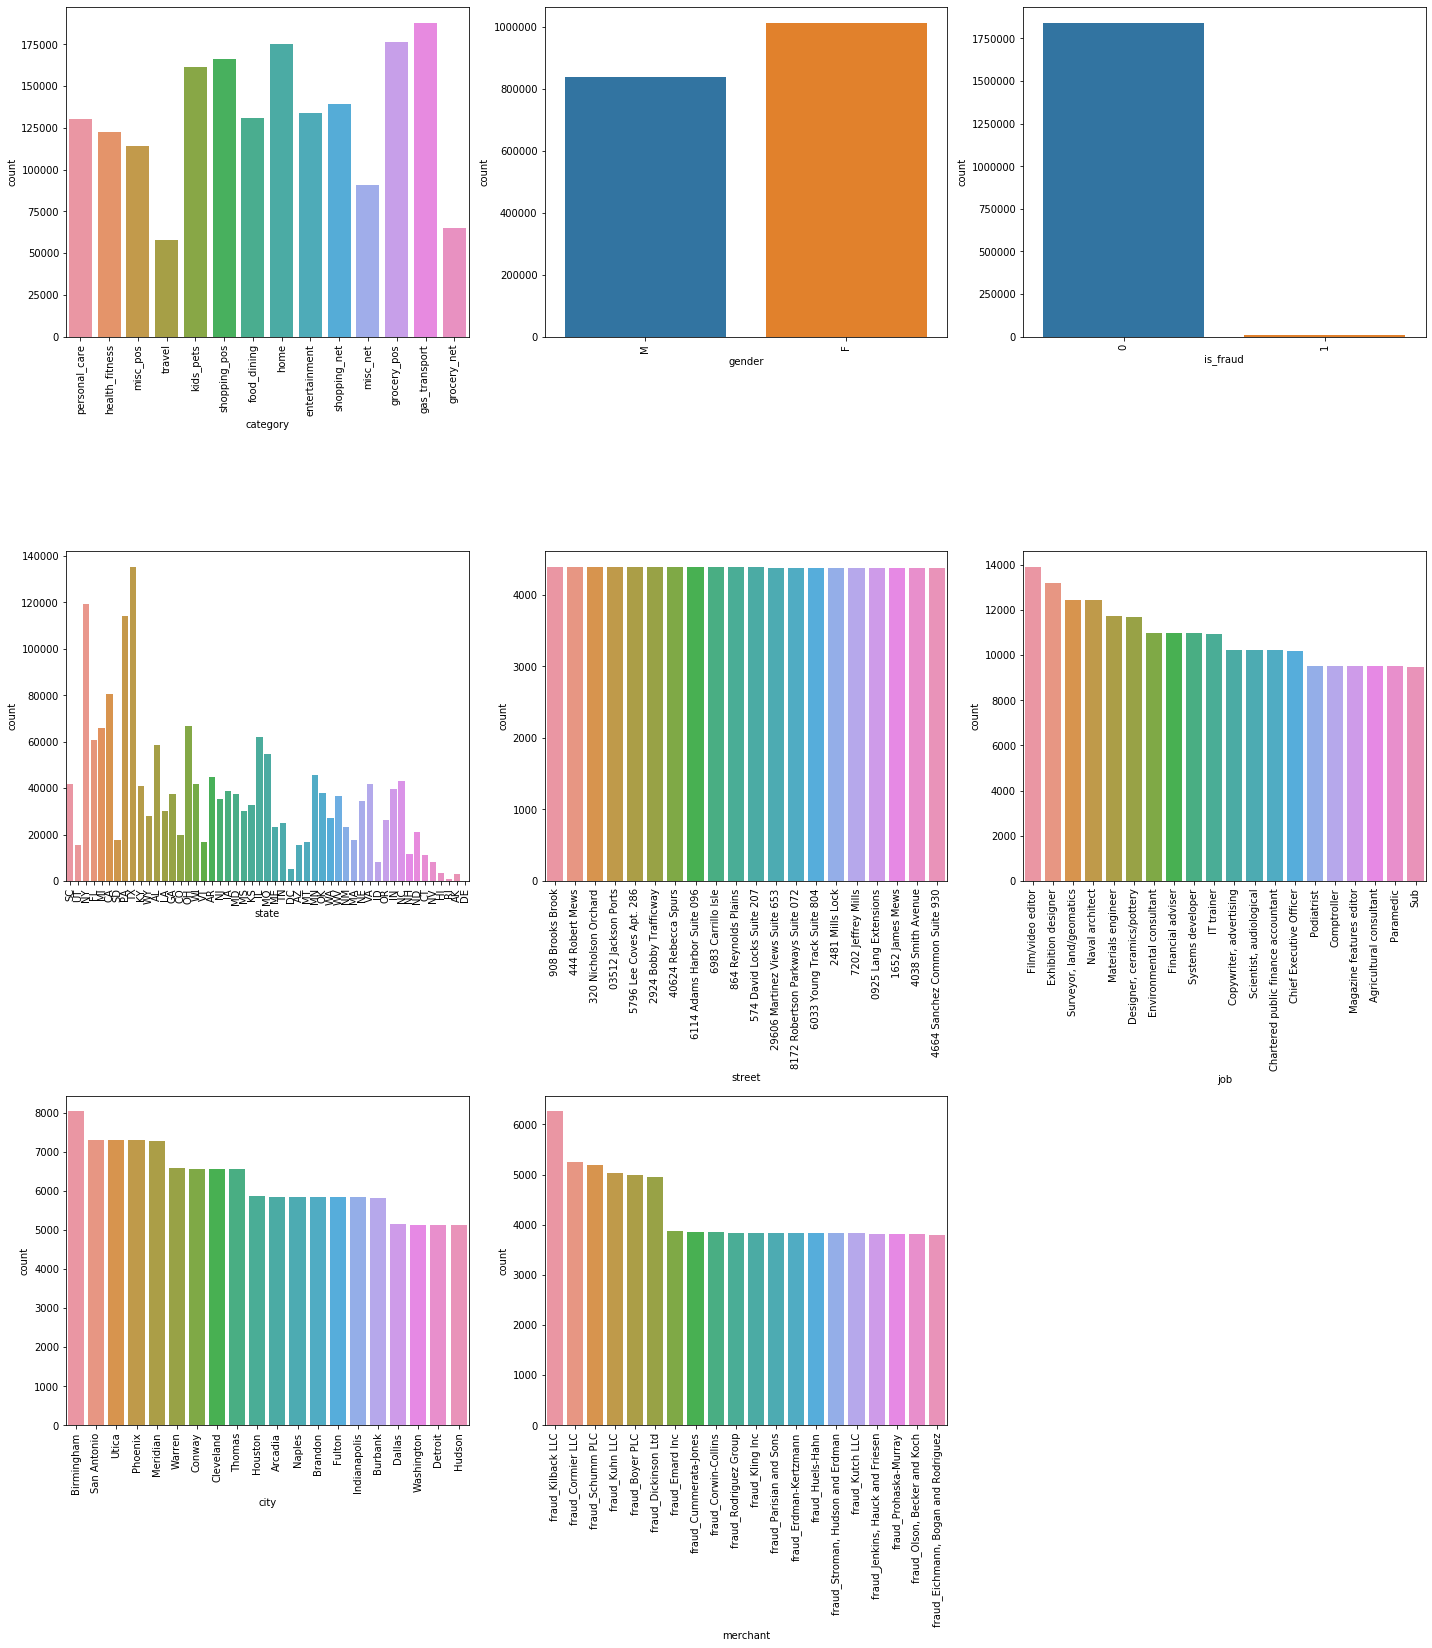

In [16]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.countplot(df['category'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(df["gender"])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.countplot(df["is_fraud"])
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.countplot(df["state"])
plt.xticks(rotation = 90)


plt.subplot(3,3,5)
sns.countplot(df["street"], order=df.street.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.countplot(df["job"], order=df.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,7)
sns.countplot(df["city"], order=df.city.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.countplot(df["merchant"], order=df.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.show()

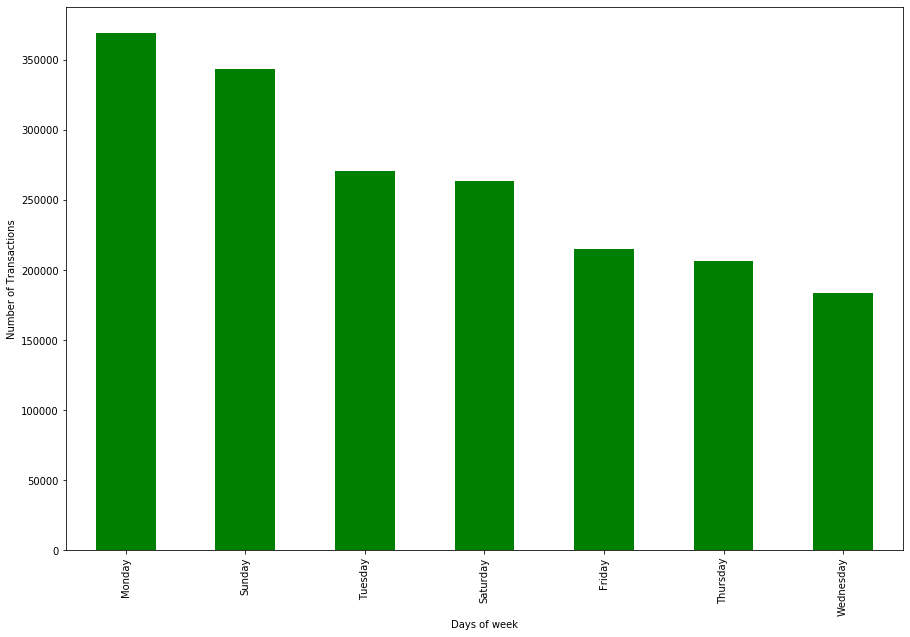

In [17]:
#distribution of transactions made on days of week
plt.figure(figsize=(15,10))
df['day_of_week'].value_counts().plot.bar(color= 'green')
plt.xlabel("Days of week")
plt.ylabel("Number of Transactions")
plt.show();

<div class="alert alert-block alert-info">  
    
#### Sunday and monday are two days where most of the transactions is been done.

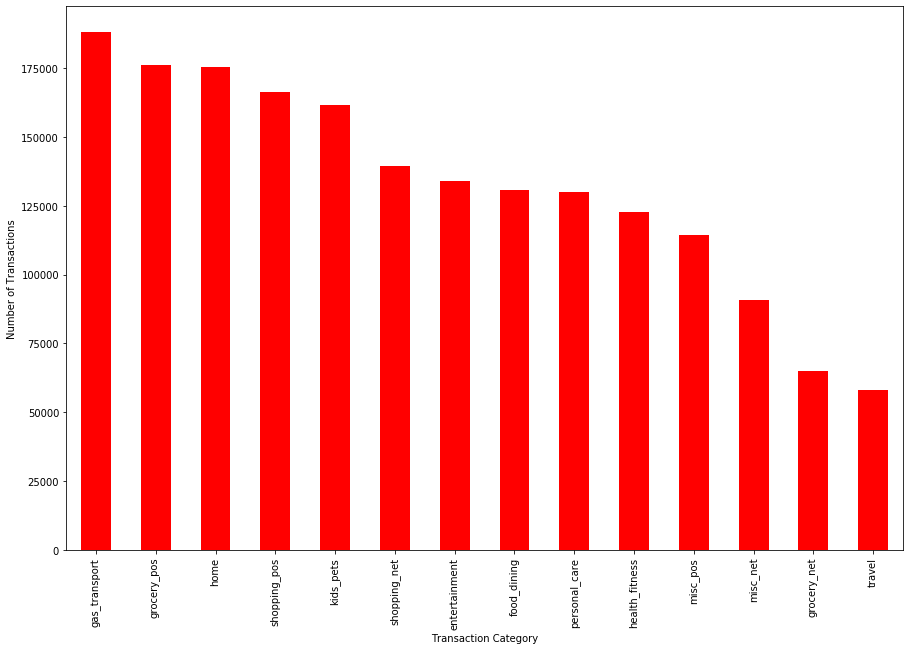

In [18]:
#distribution of transactions made for different categories
plt.figure(figsize=(15,10))
df['category'].value_counts().plot.bar(color = 'red')
plt.xlabel("Transaction Category")
plt.ylabel("Number of Transactions")
plt.show();

<div class="alert alert-block alert-info">  
    
#### There are 5 categories with transactions above 150000.

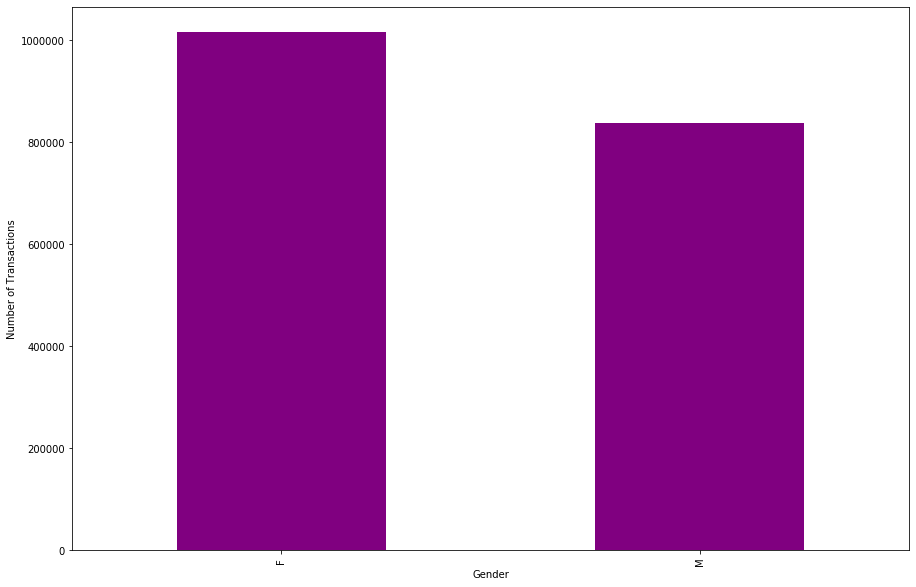

In [19]:
#distribution of transactions made among gender
plt.figure(figsize=(15,10))
df['gender'].value_counts().plot.bar(color = 'purple')
plt.xlabel("Gender")
plt.ylabel("Number of Transactions");

<div class="alert alert-block alert-info">   
    
#### Female users are more than male.
</div>

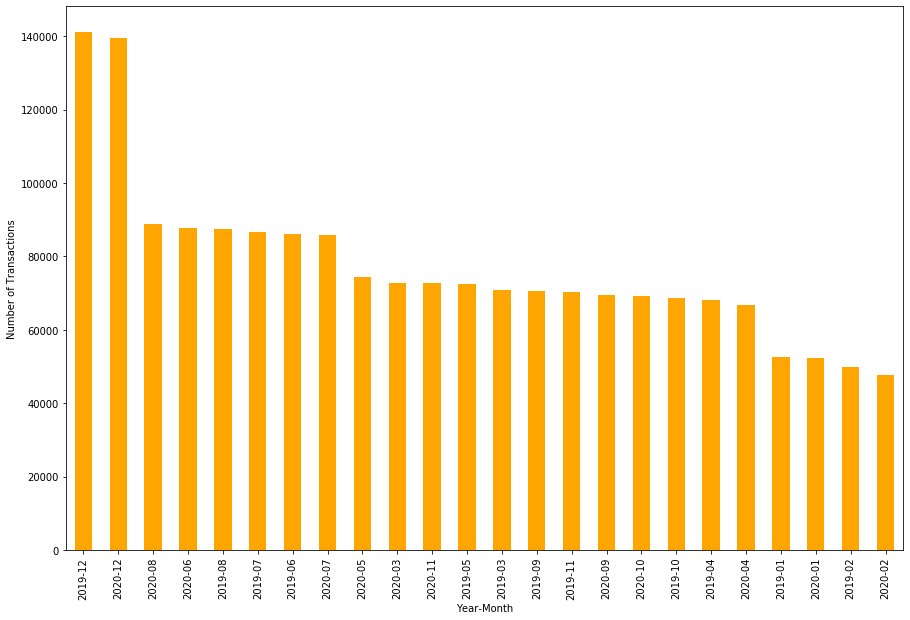

In [20]:
#distribution of transactions made in year-month
plt.figure(figsize=(15,10))
df['year_month'].value_counts().plot.bar(color = 'orange')
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.show();

<div class="alert alert-block alert-info">  
    
#### December 2019 and 2020 have the highest record of transactions.

In [21]:
#Deriving age of the customers
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age']

0          52.0
1          30.0
2          50.0
3          33.0
4          65.0
           ... 
1296670    59.0
1296671    41.0
1296672    53.0
1296673    40.0
1296674    25.0
Name: age, Length: 1852394, dtype: float64

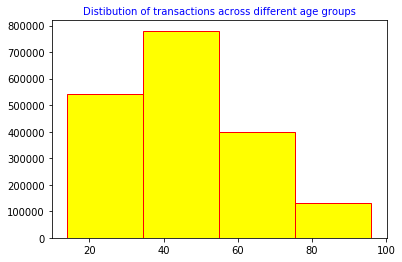

In [22]:
#distribution of fraud among different age groups
plt.hist(df.age, bins = 4,  edgecolor = "red", color= "yellow")
plt.title("Distibution of transactions across different age groups", fontdict = {"fontsize" : 10, "fontweight" : 5, "color" : "blue"})
plt.show()

<div class="alert alert-block alert-info">  
    
#### Most of the customers are from the age group 35-55.

### Bivariate Analysis

In [23]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'day_of_week', 'year_month',
       'age'],
      dtype='object')

In [24]:
df.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

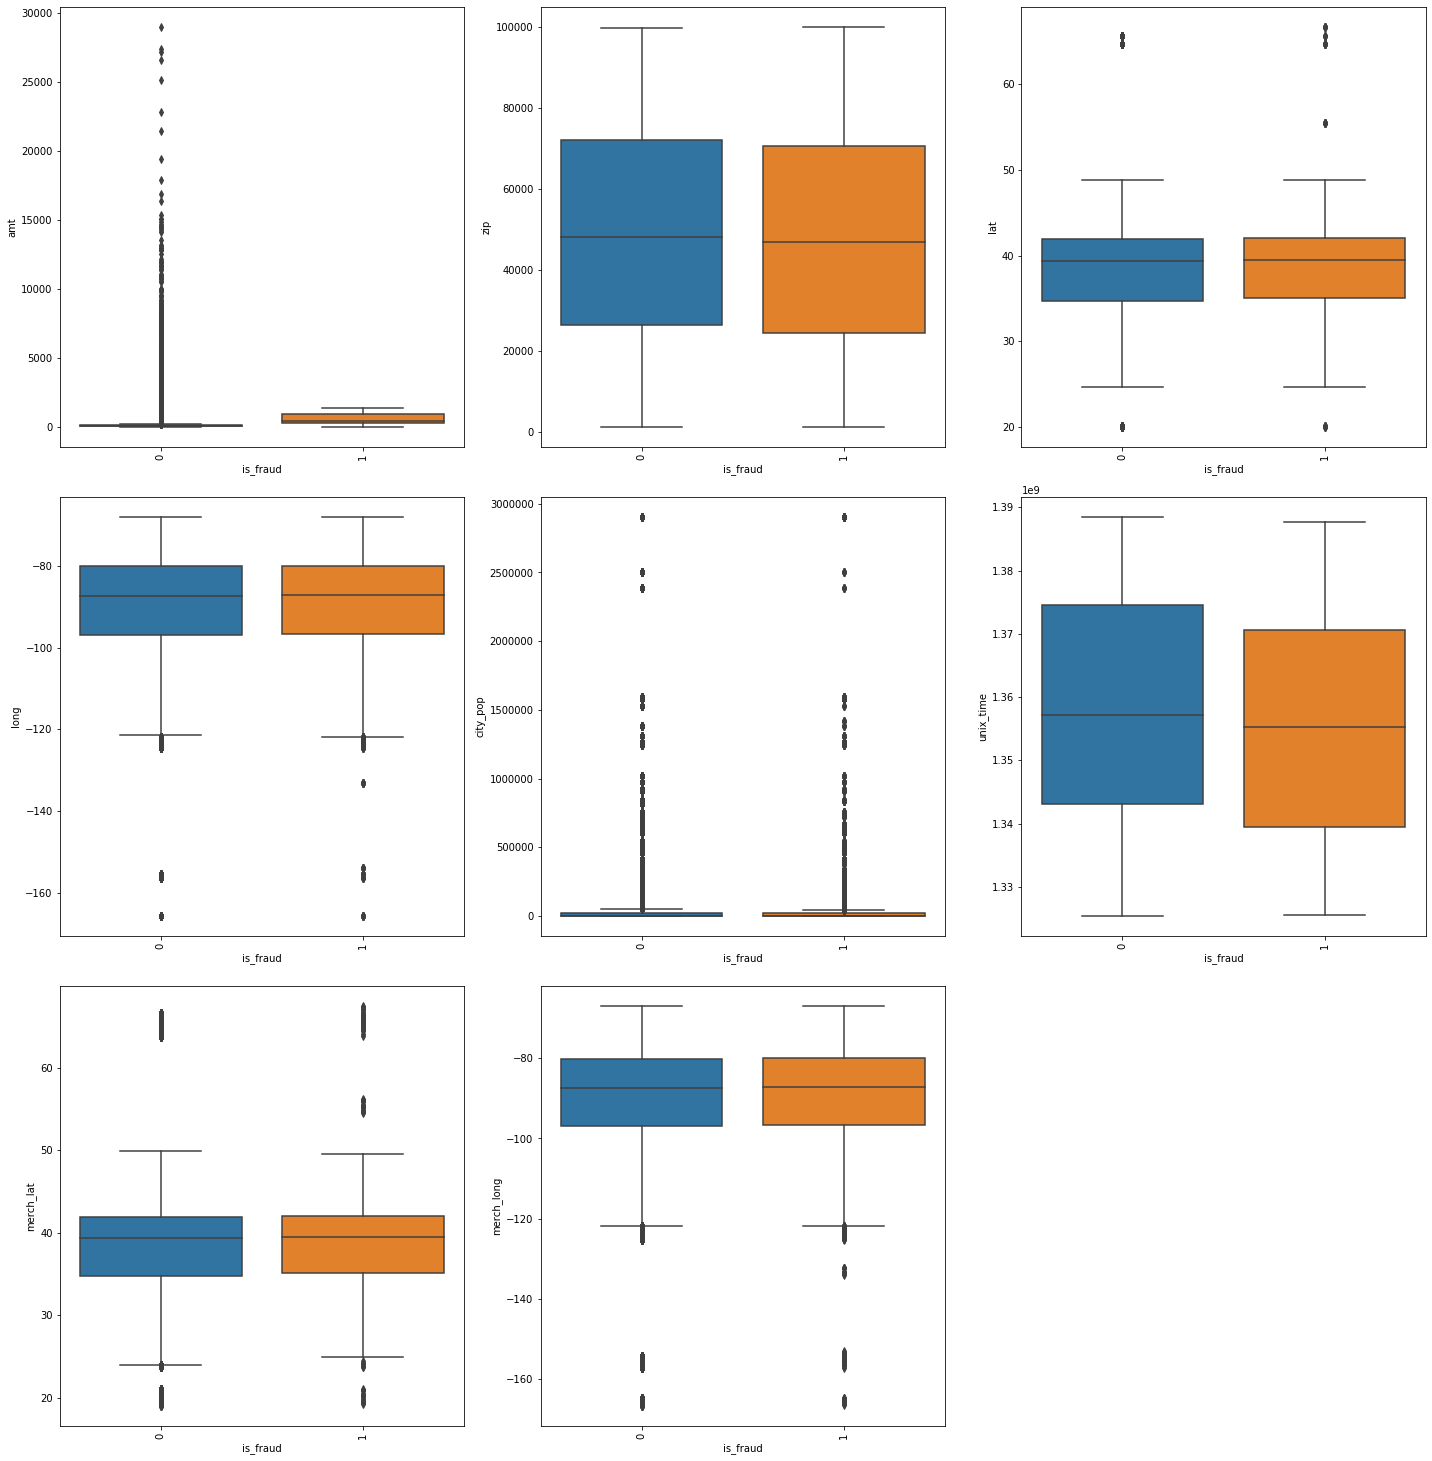

In [25]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = "amt", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.boxplot(y = "zip", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.boxplot(y = "lat", x = "is_fraud", data = df)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.boxplot(y = "long", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.boxplot(y = "city_pop", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.boxplot(y = "unix_time", x = "is_fraud", data = df)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,7)
sns.boxplot(y = "merch_lat", x = "is_fraud", data = df)
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.boxplot(y = "merch_long", x = "is_fraud", data = df)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above plot shows the boxplots between the target varibale `is_fraud` and the numerical variables i.e amt, zip, lat, long, city_pop, unix_time, merchat_lat, merchant_long, 
    

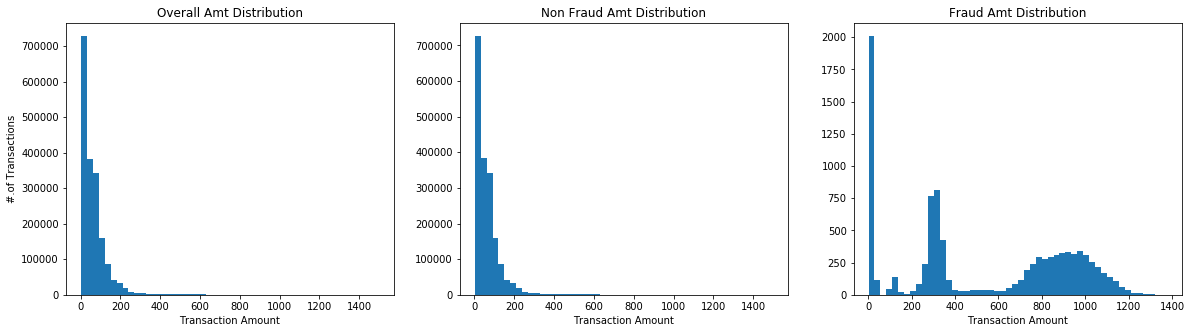

In [26]:
#distribution of transactions amount made by different fraudulant and non-fraudulant categories
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

In [27]:
#creating new dataframe to analysi=e data based on category
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

#df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

index        Category  category_count    percent
0       2   gas_transport          188029  10.150594
1       4     grocery_pos          176191   9.511529
2       6            home          175460   9.472067
3      12    shopping_pos          166463   8.986371
4       7       kids_pets          161727   8.730702
5      11    shopping_net          139322   7.521186
6       0   entertainment          134118   7.240252
7       1     food_dining          130729   7.057300
8      10   personal_care          130085   7.022534
9       5  health_fitness          122553   6.615925
10      9        misc_pos          114229   6.166561
11      8        misc_net           90654   4.893883
12      3     grocery_net           64878   3.502387
13     13          travel           57956   3.128708

<div class="alert alert-block alert-info">  
    
#### gas_transport holds for 10% of the transactions which is the highest.

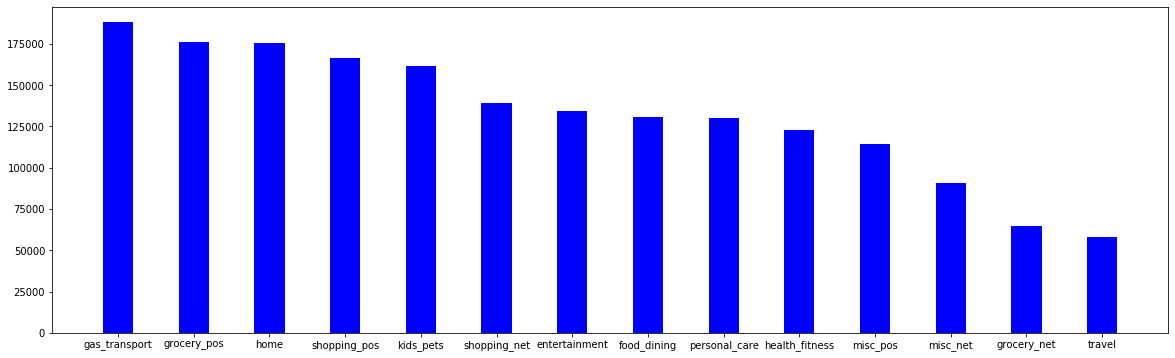

In [28]:
#plotting bar graph to show number of trnsactions happened in a particular category
fig = plt.figure(figsize = (20, 6)) 
plt.bar(df_category['Category'], df_category['category_count'],  color=('blue'), 
        width = 0.4)
plt.show()

<div class="alert alert-block alert-info">  
    
#### There are 5 categories where in transactions were more than 150000.

In [29]:
#Corelation heat map of numerical variables
# data.columns
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

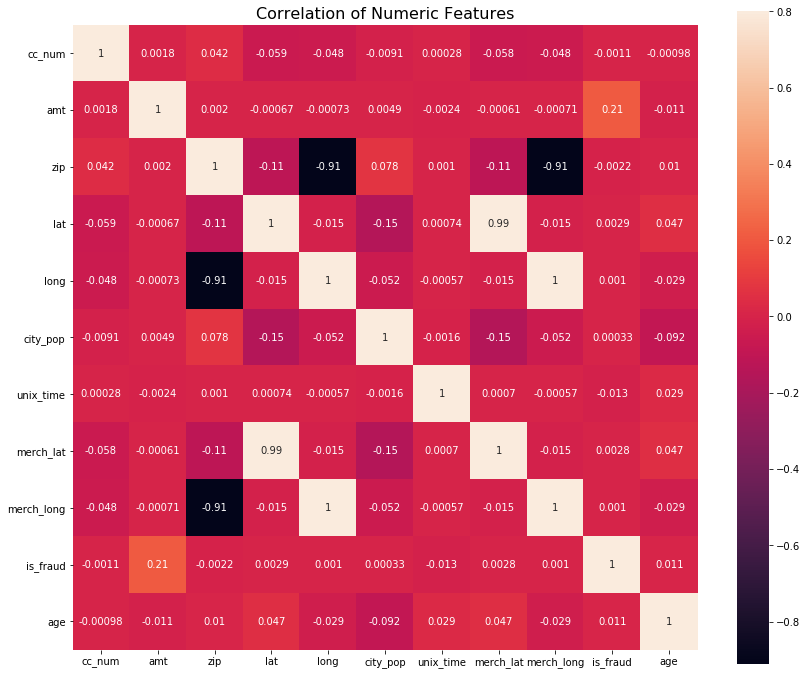

In [30]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features',y=1,size=16)
sns.heatmap(df.corr(),square = True, color = 'blue', vmax=0.8, annot= True)
plt.show()

<div class="alert alert-block alert-info">  
    
#### It can be seen that merch_lat and lat, merch_long and long are positively correlated whereas merch_long and zip are negetively correlated. we can remove one of the correlated columns.

### Creating Dummy Variables

In [31]:
category_dummy = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_dummy = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_dummy = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [32]:
df1 = pd.concat([df, category_dummy,gender_dummy,day_of_week_dummy], axis=1)
df1.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...  \
0   Elliott      M            351 Darlene Green    Columbia  ...   
1  Williams      F             3638 Marsh Union     Altonah  ...   
2     Lopez      F         9333 Valentine Point    Bellmore  ...   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...   

  category_shopping_net  category_shopping_pos  category_travel  gender_M  \
0                     0                      0                0         1   
1                     0                      0                0         0   
2                     0                      0                0         0   
3                     0                      0                0         1   
4                     0                      0                1         1   

   week_Monday week_Saturday week_Sunday week_Thursday  week_Tuesday  \
0            0             0           1             0             0   
1            0             0           1             0             0   
2            0             0           1             0             0   
3            0             0           1             0             0   
4            0             0           1             0             0   

   week_Wednesday  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 46 columns]

In [33]:
df1['category'].astype("category").value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

In [34]:
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'day_of_week', 'year_month',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday'],
      dtype='object')

In [35]:
df1.shape

(1852394, 46)

In [36]:
import plotly.express as px 

df2_fraud = df1[df1['is_fraud'] == 1]

fig = px.scatter_mapbox(df2_fraud, lat="lat", lon="long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [37]:
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'day_of_week', 'year_month',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday'],
      dtype='object')

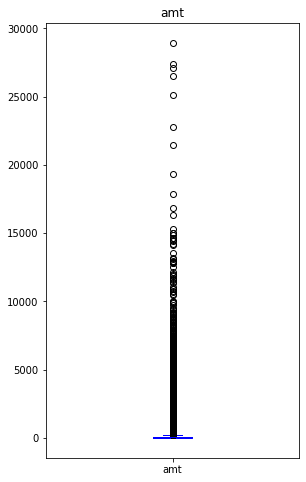

In [38]:
#Checking for Outliers
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df[col].plot.box(color ='blue')
    plt.title(col)
plt.show()

<div class="alert alert-block alert-info">  
    
#### There are some heavy amount transactions took place.

In [39]:
#Deriving distance 
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [40]:
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [41]:
#Deriving time of transaction 

df1['trans_hour'] = df1['trans_date_trans_time'].dt.hour
df1.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...  \
0   Elliott      M            351 Darlene Green    Columbia  ...   
1  Williams      F             3638 Marsh Union     Altonah  ...   
2     Lopez      F         9333 Valentine Point    Bellmore  ...   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...   

  category_travel  gender_M  week_Monday  week_Saturday  week_Sunday  \
0               0         1            0              0            1   
1               0         0            0              0            1   
2               0         0            0              0            1   
3               0         1            0              0            1   
4               1         1            0              0            1   

  week_Thursday week_Tuesday week_Wednesday        dist  trans_hour  
0             0            0              0   24.561462          12  
1             0            0              0  104.925092          12  
2             0            0              0   59.080078          12  
3             0            0              0   27.698567          12  
4             0            0              0  104.335106          12  

[5 rows x 48 columns]

### Creati Historic variables

In [42]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()

In [43]:
df1['val_for_agg'] = 1
df1['val_for_agg']

time_index
2019-01-01 00:00:18    1
2019-01-01 00:00:44    1
2019-01-01 00:00:51    1
2019-01-01 00:01:16    1
2019-01-01 00:03:06    1
                      ..
2020-12-31 23:59:07    1
2020-12-31 23:59:09    1
2020-12-31 23:59:15    1
2020-12-31 23:59:24    1
2020-12-31 23:59:34    1
Name: val_for_agg, Length: 1852394, dtype: int64

In [44]:
#Deriving 60 days of trancation by customers
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [45]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [46]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()
df_hist_trans_60d.head()

cc_num  trans_date  hist_trans_60d
0  60416207185  2019-01-01             0.0
1  60416207185  2019-01-02             1.0
2  60416207185  2019-01-03             5.0
3  60416207185  2019-01-04             7.0
4  60416207185  2019-01-05             9.0

### 24hrs transaction.

In [47]:
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']
df_hist_orders_24h.head()

cc_num trans_date_trans_time  hist_trans_24h
0  60416207185   2019-01-01 12:47:15             0.0
1  60416207185   2019-01-02 08:44:57             1.0
2  60416207185   2019-01-02 08:47:36             2.0
3  60416207185   2019-01-02 12:38:14             3.0
4  60416207185   2019-01-02 13:10:46             4.0

In [48]:
#24 hrs fraud historic transactions
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']
df_hist_fraud_trans_24h.head()

cc_num trans_date_trans_time  hist_fraud_trans_24h
0  60416207185   2019-03-01 01:32:53                   0.0
1  60416207185   2019-03-01 02:42:25                   1.0
2  60416207185   2019-03-01 23:06:58                   2.0
3  60416207185   2019-03-02 22:10:38                   3.0
4  60416207185   2019-03-02 22:10:59                   2.0

### 2 Hours Fraud.

In [49]:
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']
df_hist_fraud_trans_2h.head()

cc_num trans_date_trans_time  hist_fraud_trans_2h
0  60416207185   2019-03-01 01:32:53                  0.0
1  60416207185   2019-03-01 02:42:25                  1.0
2  60416207185   2019-03-01 23:06:58                  2.0
3  60416207185   2019-03-02 22:10:38                  1.0
4  60416207185   2019-03-02 22:10:59                  1.0

### 60 Day Orders Amt Avg.

In [50]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [51]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [52]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()
df_hist_trans_amt_avg_60d.head(10)

cc_num  trans_date  hist_trans_avg_amt_60d
0  60416207185  2019-01-01                0.000000
1  60416207185  2019-01-02                7.270000
2  60416207185  2019-01-03               35.188333
3  60416207185  2019-01-04               31.365714
4  60416207185  2019-01-05               40.378889
5  60416207185  2019-01-06               43.053636
6  60416207185  2019-01-07               48.005000
7  60416207185  2019-01-08               60.016154
8  60416207185  2019-01-09               70.423125
9  60416207185  2019-01-10               69.753889

In [53]:
##### Merging Historical Variables with Transactions by ['cc_num','trans_date_trans_time']
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [54]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [55]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [56]:
df2.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ... week_Tuesday  \
0                561 Perry Cove  Moravian Falls  ...            1   
1  43039 Riley Greens Suite 393          Orient  ...            1   
2      594 White Dale Suite 530      Malad City  ...            1   
3   9443 Cynthia Court Apt. 038         Boulder  ...            1   
4              408 Bradley Rest        Doe Hill  ...            1   

   week_Wednesday        dist  trans_hour  val_for_agg hist_trans_60d  \
0               0   78.597568           0            1            1.0   
1               0   30.212176           0            1            1.0   
2               0  108.206083           0            1            8.0   
3               0   95.673231           0            1            1.0   
4               0   77.556744           0            1            1.0   

  hist_trans_24h hist_fraud_trans_24h  hist_fraud_trans_2h  \
0            6.0                  0.0                  0.0   
1            1.0                  0.0                  0.0   
2            5.0                  0.0                  0.0   
3            5.0                  0.0                  0.0   
4            6.0                  0.0                  0.0   

   hist_trans_avg_amt_60d  
0                4.970000  
1               47.488421  
2              377.925000  
3               45.000000  
4               41.960000  

[5 rows x 54 columns]

In [57]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

## 5. Handling Data Imbalance

## Oversampling Data

In [58]:
#Since the data is highly imbalanced we need to oversample the data.
cnt_non_fraud = df2[df2['is_fraud'] == 0]['amt'].count()
df1_class_fraud = df2[df2['is_fraud'] == 1]
df1_class_nonfraud = df2[df2['is_fraud'] == 0]


In [59]:
#OverSampling
df1_class_fraud_oversample = df1_class_fraud.sample(cnt_non_fraud, replace=True)
df1_oversampled = pd.concat([df1_class_nonfraud, df1_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df1_oversampled['is_fraud'].value_counts())

Random over-sampling:
1    1842831
0    1842831
Name: is_fraud, dtype: int64


In [60]:
df1_oversampled.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ... week_Tuesday  \
0                561 Perry Cove  Moravian Falls  ...            1   
1  43039 Riley Greens Suite 393          Orient  ...            1   
2      594 White Dale Suite 530      Malad City  ...            1   
3   9443 Cynthia Court Apt. 038         Boulder  ...            1   
4              408 Bradley Rest        Doe Hill  ...            1   

   week_Wednesday        dist  trans_hour  val_for_agg hist_trans_60d  \
0               0   78.597568           0            1            1.0   
1               0   30.212176           0            1            1.0   
2               0  108.206083           0            1            8.0   
3               0   95.673231           0            1            1.0   
4               0   77.556744           0            1            1.0   

  hist_trans_24h hist_fraud_trans_24h  hist_fraud_trans_2h  \
0            6.0                  0.0                  0.0   
1            1.0                  0.0                  0.0   
2            5.0                  0.0                  0.0   
3            5.0                  0.0                  0.0   
4            6.0                  0.0                  0.0   

   hist_trans_avg_amt_60d  
0                4.970000  
1               47.488421  
2              377.925000  
3               45.000000  
4               41.960000  

[5 rows x 54 columns]

## 6. Test -Train split:

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
df2.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'day_of_week', 'year_month',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist', 'trans_hour',
       'val_for_agg', 'hist_trans_60d', 'hist_trans_24h',
       'hist_fraud_trans_24h', 'hist_fraud_trans_2h',
       'hist_trans_avg_amt_60d'],
      dtype='object')

In [63]:
X = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] #

y = ['is_fraud']

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df1_oversampled[X],df1_oversampled[y] , train_size=0.7, test_size=0.3, random_state=42)

In [65]:
X_train.shape

(2579963, 29)

In [66]:
X_test.shape

(1105699, 29)

In [67]:
X_train.head()

amt  city_pop  trans_hour   age  category_food_dining  \
445165     13.43     21902           1  39.0                     0   
1174322     9.00      7339           3  58.0                     0   
1273094  1050.50      1178          23  69.0                     0   
578455      6.74      1051           3  43.0                     0   
1466614   123.40      8512          13  69.0                     0   

         category_gas_transport  category_grocery_net  category_grocery_pos  \
445165                        1                     0                     0   
1174322                       1                     0                     0   
1273094                       0                     0                     0   
578455                        0                     0                     0   
1466614                       0                     0                     0   

         category_health_fitness  category_home  ...  week_Tuesday  \
445165                         0              0  ...             0   
1174322                        0              0  ...             1   
1273094                        0              0  ...             0   
578455                         0              0  ...             0   
1466614                        0              0  ...             0   

         week_Wednesday  week_Thursday  week_Saturday  week_Sunday  \
445165                1              0              0            0   
1174322               0              0              0            0   
1273094               0              0              0            0   
578455                0              0              0            0   
1466614               1              0              0            0   

               dist  hist_trans_60d  hist_trans_24h  hist_fraud_trans_24h  \
445165    63.727506           248.0             2.0                   0.0   
1174322   11.834789             1.0             2.0                   0.0   
1273094   84.173007           229.0             2.0                   0.0   
578455   125.895630           211.0             8.0                   0.0   
1466614   56.437429           135.0             1.0                   0.0   

         hist_trans_avg_amt_60d  
445165                77.211895  
1174322               86.830824  
1273094               59.718745  
578455                65.759858  
1466614               60.623942  

[5 rows x 29 columns]

In [68]:
X_train.columns

Index(['amt', 'city_pop', 'trans_hour', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'week_Monday',
       'week_Tuesday', 'week_Wednesday', 'week_Thursday', 'week_Saturday',
       'week_Sunday', 'dist', 'hist_trans_60d', 'hist_trans_24h',
       'hist_fraud_trans_24h', 'hist_trans_avg_amt_60d'],
      dtype='object')

### 7. Model Building Or Hyper-parameter tuning : 

- Logistic Regression
- Decision Trees
- Random Forest

### Logistic Regression

In [69]:
#Importing Library
from sklearn.linear_model import LogisticRegression

In [70]:
logreg = LogisticRegression(random_state=42)

In [71]:
#Building Logistic Regression  Model
logreg.fit(X_train, y_train)

C:\Users\susha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=42)

In [72]:
#Model Evaluation
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [74]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[1202252   87756]
 [ 328930  961025]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85   1290008
           1       0.92      0.75      0.82   1289955

    accuracy                           0.84   2579963
   macro avg       0.85      0.84      0.84   2579963
weighted avg       0.85      0.84      0.84   2579963



In [75]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[515355  37468]
 [140912 411964]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85    552823
           1       0.92      0.75      0.82    552876

    accuracy                           0.84   1105699
   macro avg       0.85      0.84      0.84   1105699
weighted avg       0.85      0.84      0.84   1105699



<div class="alert alert-block alert-info"> 
    
## Logistoic Regression model results:

### Training data: 
 
    Accuracy - 84%

    recall   - 76%

### Testing data:

    Accuracy - 84%

    recall   - 76%

### Decision Tree Model

In [76]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [77]:
#Model Evaluation
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1288629    1379]
 [      0 1289955]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [78]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[552089    734]
 [     0 552876]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



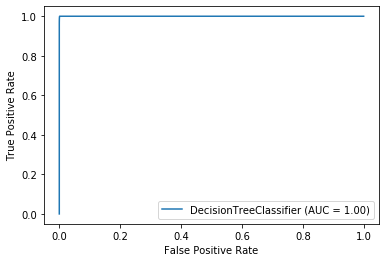

In [79]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_clf, X_train, y_train, drop_intermediate=False)
plt.show()

<div class="alert alert-block alert-info">  
    
## Decision Tree model results:

### Training data: 

    Accuracy - 100%
    recall   - 100%

### Testing data:

    Accuracy - 100%
    recall   - 100%

### Random-Forest Classifier

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

### Grid Search Random Forest

In [83]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

C:\Users\susha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [84]:
#Model Evaluation
print("Train Results")
pred_train = rf_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.5s finished


[[1289874     134]
 [    376 1289579]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [85]:
#predicting on test set
print("Test Results")
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.7s finished


[[552731     92]
 [   160 552716]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.2s finished


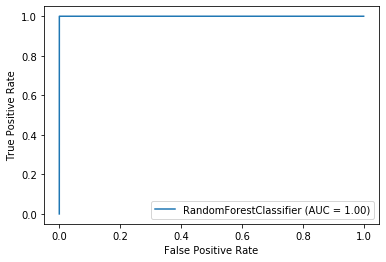

In [86]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_clf, X_train, y_train)
plt.show()

<div class="alert alert-block alert-info">  
    
## Random Forest model results:

### Training data: 

    Accuracy - 100%
    recall   - 100%

### Testing data:

    Accuracy - 100%
    recall   - 100%

## 9. Cost Benefit Analsis

In [87]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count              1.852394e+06                1.842743e+06   
1     mean              7.006357e+01                6.765128e+01   
2      std              1.592540e+02                1.535481e+02   
3      min              1.000000e+00                1.000000e+00   
4      50%              4.745000e+01                4.724000e+01   
5      95%              1.953400e+02                1.895900e+02   
6    99.9%              1.517241e+03                1.519623e+03   
7      max              2.894890e+04                2.894890e+04   

   Fraud Amt Distribution  
0             9651.000000  
1              530.661412  
2              391.028873  
3                1.060000  
4              390.000000  
5             1084.090000  
6             1293.127000  
7             1376.040000

<div class="alert alert-block alert-info">  
    
### Average fraud amount is 530.66

In [88]:
#Monthly num_of_fraud_transactions
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02
df_timeline02

year_month  num_of_fraud_transactions  fraud_customers
0     2019-01                        506               50
1     2019-02                        517               53
2     2019-03                        494               49
3     2019-04                        376               41
4     2019-05                        408               42
5     2019-06                        354               35
6     2019-07                        331               36
7     2019-08                        382               39
8     2019-09                        418               44
9     2019-10                        454               50
10    2019-11                        388               41
11    2019-12                        592               62
12    2020-01                        343               40
13    2020-02                        336               35
14    2020-03                        444               45
15    2020-04                        302               36
16    2020-05                        527               54
17    2020-06                        467               47
18    2020-07                        321               35
19    2020-08                        415               41
20    2020-09                        340               35
21    2020-10                        384               39
22    2020-11                        294               31
23    2020-12                        258               26

In [89]:
#Average number of fraudulent transaction per month
df_timeline02['num_of_fraud_transactions'].mean()

402.125

In [90]:
#Yearly num_of_fraud_transactions
df_timeline01 = df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

year_month  num_of_transactions  customers
0     2019-01                52525        913
1     2019-02                49866        918
2     2019-03                70939        916
3     2019-04                68078        913
4     2019-05                72532        910
5     2019-06                86064        908
6     2019-07                86596        910
7     2019-08                87359        911
8     2019-09                70652        913
9     2019-10                68758        912
10    2019-11                70421        911
11    2019-12               141060        916
12    2020-01                52202        911
13    2020-02                47791        909
14    2020-03                72850        912
15    2020-04                66892        914
16    2020-05                74343        915
17    2020-06                87805        911
18    2020-07                85848        911
19    2020-08                88759        908
20    2020-09                69533        914
21    2020-10                69348        913
22    2020-11                72635        909
23    2020-12               139538        910

In [91]:
#Average Number of transactions by month(Cost Benifit Analysis)
print(df_timeline01['num_of_transactions'].mean())

77183.08333333333


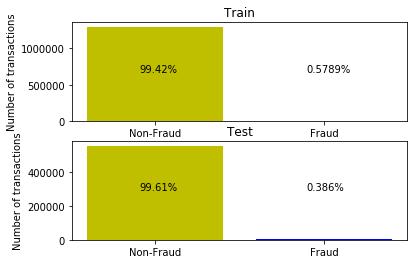

is_fraud    count  percentage
0         0  1842743   99.478999
1         1     9651    0.521001

In [92]:
classes_train=dataframe_2['is_fraud'].value_counts()
normal_share_train=classes_train[0]/dataframe_2['is_fraud'].count()*100
fraud_share_train=classes_train[1]/dataframe_2['is_fraud'].count()*100

classes_test=dataframe_1['is_fraud'].value_counts()
normal_share_test=classes_test[0]/dataframe_1['is_fraud'].count()*100
fraud_share_test=classes_test[1]/dataframe_1['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['y','b'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['y','b'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

<div class="alert alert-block alert-info">  
    
#### Total number of frauds in data sets are 9651,so on average 402.125 frauds per month

#### Our Decision Tree model has 100% recall, so our model is able to predict all the frauds in the dataset
    
#### Decision Tree model and Random forest model has the highest recall and accuracy